In [1]:
# parse created TFRecords to check a few images
import tensorflow as tf
import numpy as np
from data_decoders import tf_example_decoder
import utils.visualization_utils as viz_utils
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tfrecord_path = 'data/train.record' # path to TFRecord file
dataset = tf.data.TFRecordDataset(tfrecord_path) # convert to dataset for parsing
decoder = tf_example_decoder.TfExampleDecoder() # decoder for PASCAL VOC format TFRecords

category_index = {
    1: {'id': 1, 'name': 'truck'}
}

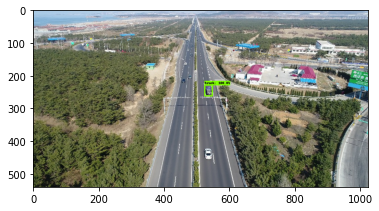

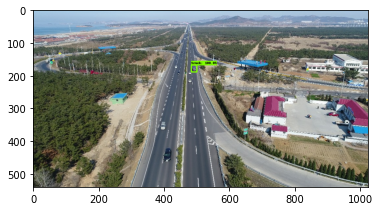

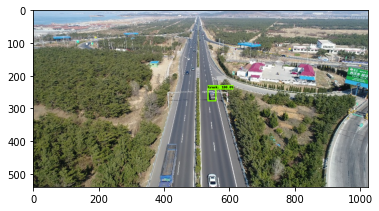

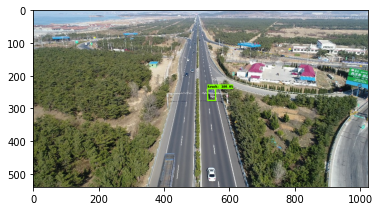

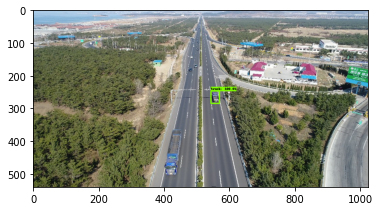

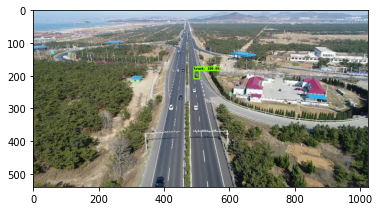

In [3]:
# loop over examples in dataset and plot image/bounding box using OD API viz_utils
n_ims = 5 # stop after five for now

for idx, example in enumerate(dataset.as_numpy_iterator()):
    im_dict = decoder.decode(example) # decode image to dictionary
    im_np = im_dict['image'].numpy() # convert image data to numpy array

    # see object_detection/utils/visualization_utils.py for details...
    viz_utils.visualize_boxes_and_labels_on_image_array(image=im_np,
            boxes=im_dict['groundtruth_boxes'].numpy(), 
            classes=im_dict['groundtruth_classes'].numpy().astype(np.int32), 
            scores=np.ones(1),
            category_index=category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=1)

    # create figure and show image
    plt.figure()
    plt.imshow(im_np)

    # stop after n_ims
    if idx >= (n_ims - 1):
        break

In [ ]:
# # parsing bounding boxes to see size of targets in image
# im_sz = (1024, 540) # (w, h)
# scale = 640./1024. # images resized to 640x640 with padding

# tgt_sz = np.zeros(shape=(360, 2))
# for idx, example in enumerate(dataset.as_numpy_iterator()):
#     im_dict = decoder.decode(example)

#     # bboxes are [ymin, xmin, ymax, xmax]
#     bbox_tf = im_dict['groundtruth_boxes'].numpy()[0]

#     tgt_sz[idx, 1] = (bbox_tf[2] - bbox_tf[0])*im_sz[1]
#     tgt_sz[idx, 0] = (bbox_tf[3] - bbox_tf[1])*im_sz[0]

# print(np.mean(tgt_sz*scale, axis=0))
# print(np.max(tgt_sz*scale, axis=0))
# print(np.min(tgt_sz*scale, axis=0))